In [1]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cmcrameri

  Using cached cmcrameri-1.9-py3-none-any.whl.metadata (4.6 kB)
Using cached cmcrameri-1.9-py3-none-any.whl (277 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importamos bibliotecas que vamos a usar
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from cmcrameri import cm

In [7]:
# Funciòn para mapear contour y contourf
def contour_f(data,contourdata,levels=np.arange(0,11),ccmap='PuBu',extend='max',limite_NS=42,clevels=np.arange(230,300,15),titulo='OLR y pr',cbarlabel='pr  [mm day$^{-1}$]'):
    lons,lats=data.lon,data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    contourdata, lon = add_cyclic_point(contourdata, coord=lons)
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
    cc=ax.contour(lon,lats,contourdata,levels=clevels,colors='k',transform=ccrs.PlateCarree())
    ax.clabel(cc, cc.levels, inline=True, fontsize=10)
    ax.set_extent([-180,180, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = True
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo,fontsize=13)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

### **<font color="Purple"> Datos históricos (anual) </font>**

In [8]:
# Leer los archivos de viento 
u_filename='ua_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'
v_filename='va_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'

In [9]:
# Abrir archivos y seleccionar variables a usar 
u_ds=xr.open_dataset(u_filename)
ua=u_ds['ua']  #viento zonal
plevu=u_ds['plev'] #presiones
v_ds=xr.open_dataset(v_filename)
va=v_ds['va']
plevv=v_ds['plev']

In [10]:
#Seleccionar solo 200 hPa y de 1979 a 2014
ua200hPa = ua.sel(plev=20000).where(ua.time.dt.year >= 1979, drop=True)
va200hPa = va.sel(plev=20000).where(va.time.dt.year >= 1979, drop=True)

In [11]:
# Hacer el promedio anual de viento a 200 hPa
ua_anual200hPa=ua200hPa.mean(dim='time') 
va_anual200hPa=va200hPa.mean(dim='time') 

In [12]:
# Calcular la magnitud del viento usando sus componentes 
magnitud200hPa = np.sqrt(ua_anual200hPa**2 + va_anual200hPa**2)

In [13]:
#Seleccionar solo 850 hPa y de 1979 a 2014
ua850hPa = ua.sel(plev=85000).where(ua.time.dt.year >= 1979, drop=True)
va850hPa = va.sel(plev=85000).where(va.time.dt.year >= 1979, drop=True)

In [14]:
# Hacer el promedio anual de viento a 850 hPa
ua_anual850hPa=ua850hPa.mean(dim='time') 
va_anual850hPa=va850hPa.mean(dim='time') 

In [15]:
# Calcular la magnitud del viento usando sus componentes 
magnitud850hPa = np.sqrt(ua_anual850hPa**2 + va_anual850hPa**2)

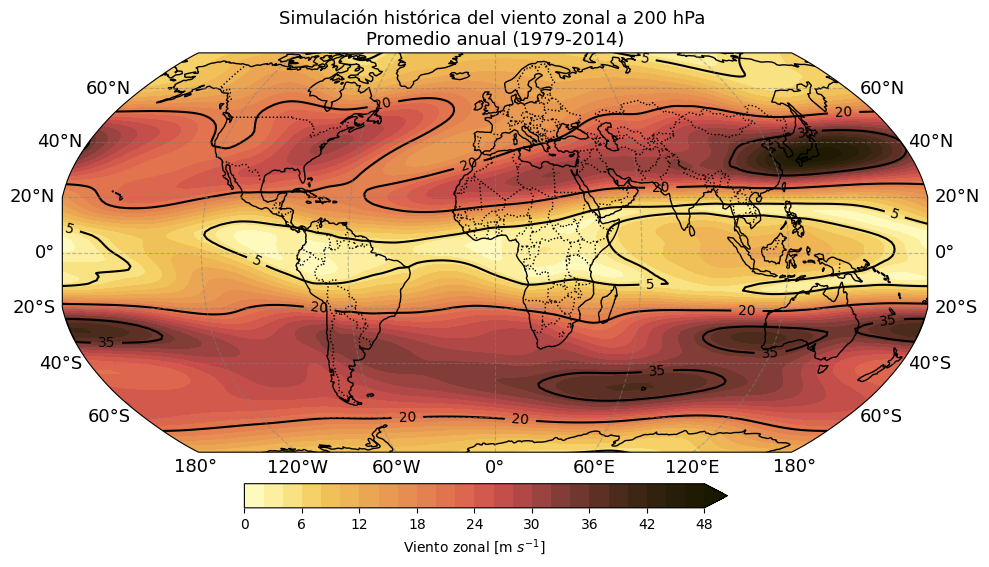

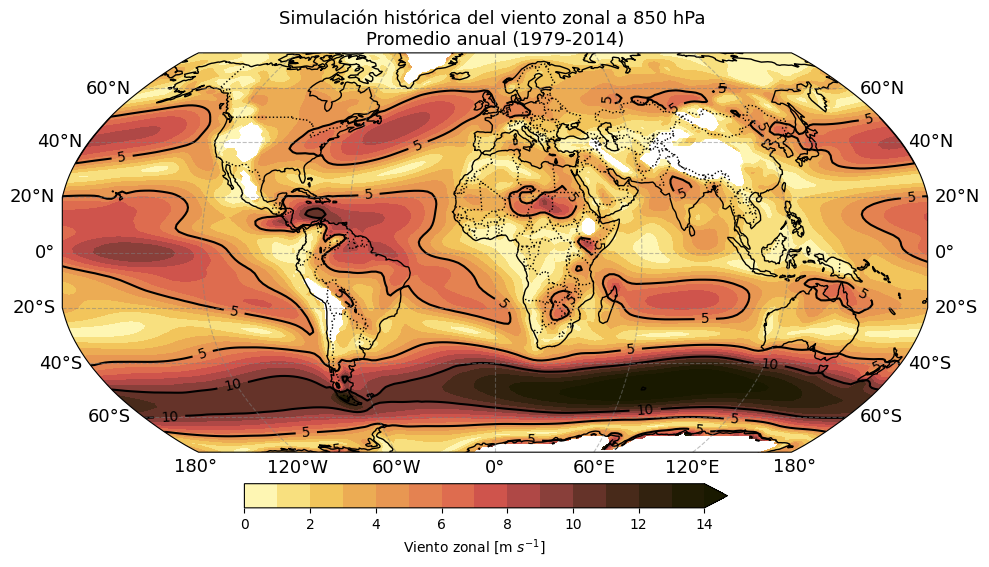

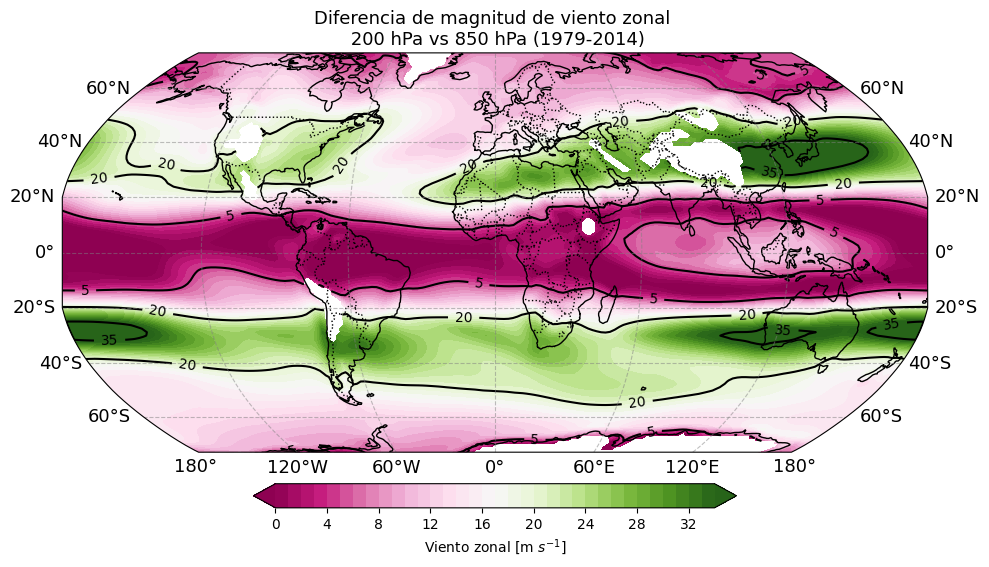

In [16]:
# Mapear promedio anual de viento a 200 hPa 
contour_f(magnitud200hPa,magnitud200hPa,levels=np.arange(0,50,2),ccmap=cm.lajolla_r,extend='max',limite_NS=75,clevels=np.arange(5,50,15),
          titulo='Simulación histórica del viento zonal a 200 hPa \nPromedio anual (1979-2014)',cbarlabel='Viento zonal [m $s^{-1}$]')

# Mapear promedio anual de viento a 850 hPa 
contour_f(magnitud850hPa,magnitud850hPa,levels=np.arange(0,15),ccmap=cm.lajolla_r,extend='max',limite_NS=75,clevels=np.arange(0,15,5),
          titulo='Simulación histórica del viento zonal a 850 hPa \nPromedio anual (1979-2014)',cbarlabel='Viento zonal [m $s^{-1}$]')

# Mapear diferencia del promedio anual de viento a 200 hPa y 850 hPa
contour_f(magnitud200hPa-magnitud850hPa,magnitud200hPa-magnitud850hPa,levels=np.arange(0,35),ccmap='PiYG',extend='both',limite_NS=75,clevels=np.arange(5,75,15),
          titulo='Diferencia de magnitud de viento zonal \n 200 hPa vs 850 hPa (1979-2014)',cbarlabel='Viento zonal [m $s^{-1}$]')

---
### **<font color="Purple"> Datos históricos de viento zonal en DJF</font>**
---

In [17]:
# Calcular promedio estacional de u,v y seleccionar DJF
ua_estacion=ua200hPa.groupby(ua200hPa.time.dt.season).mean(dim='time') 
ua_DJF = ua_estacion[0]
va_estacion=va200hPa.groupby(va200hPa.time.dt.season).mean(dim='time') 
va_DJF = va_estacion[0]

In [18]:
#magnitud de vector con componentes u,v
magnitudDJF = np.sqrt(ua_DJF**2 + va_DJF**2)

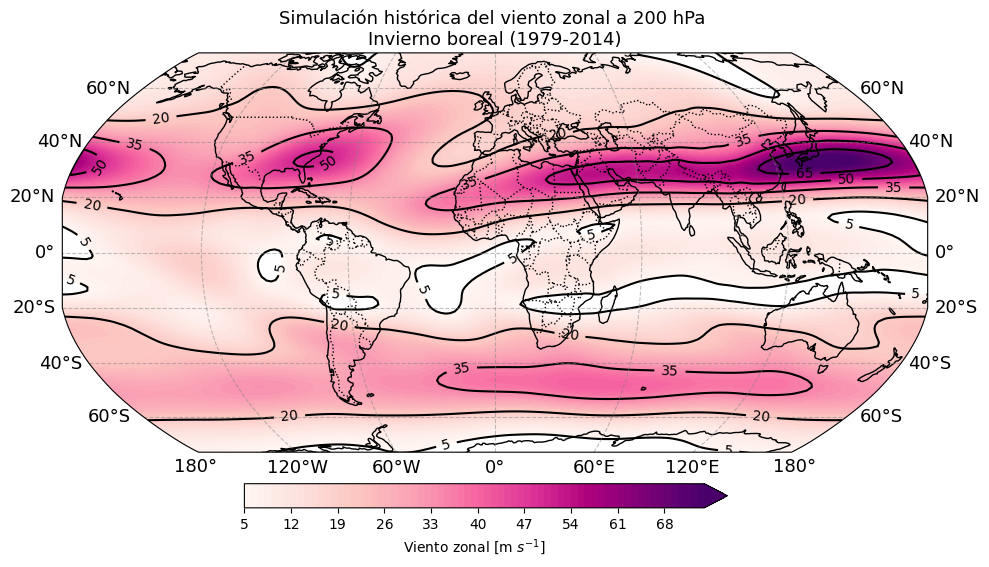

In [19]:
# Mapear la magnitud del viento zonal en DJF
contour_f(magnitudDJF,magnitudDJF,levels=np.arange(5,75),ccmap='RdPu',extend='max',limite_NS=75,clevels=np.arange(5,75,15),titulo=
      'Simulación histórica del viento zonal a 200 hPa \nInvierno boreal (1979-2014)',cbarlabel='Viento zonal [m $s^{-1}$]')
#plt.savefig('historical_200hPa.png', dpi=300, bbox_inches='tight')

----
### **<font color="Purple"> Datos escenario ssp585 de viento zonal en DJF</font>**
---

In [20]:
# Leer archivo ssp585
u_filename585 = 'ua_Amon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_205001-210012.nc'
v_filename585='va_Amon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_205001-210012.nc'

In [21]:
# Seleccionar variables del archivo ssp585
u_ds585=xr.open_dataset(u_filename585)
ua585=u_ds585['ua']
v_ds585=xr.open_dataset(v_filename585)
va585=v_ds585['va']

In [22]:
#ua_585=ua585.where(ua585.time.dt.year>2069) #solo periodo de 2070 a 2100
#Seleccionar solo el nivel de 200 hPa
ua2070 = ua585.sel(plev=20000).where(ua585.time.dt.year >= 2070, drop=True)
va2070 = va585.sel(plev=20000).where(va585.time.dt.year >= 2070, drop=True)

In [23]:
# Calcular promedio estacional y selecionar DJF
ua_585_estacion=ua2070.groupby(ua2070.time.dt.season).mean(dim='time') 
ua_585_DJF = ua_585_estacion[0]
va_585_estacion=va2070.groupby(va2070.time.dt.season).mean(dim='time') 
va_585_DJF = va_585_estacion[0]

In [24]:
#magnitud de vector con componentes u,v
magnitud585 = np.sqrt(ua_585_DJF**2 + va_585_DJF**2)

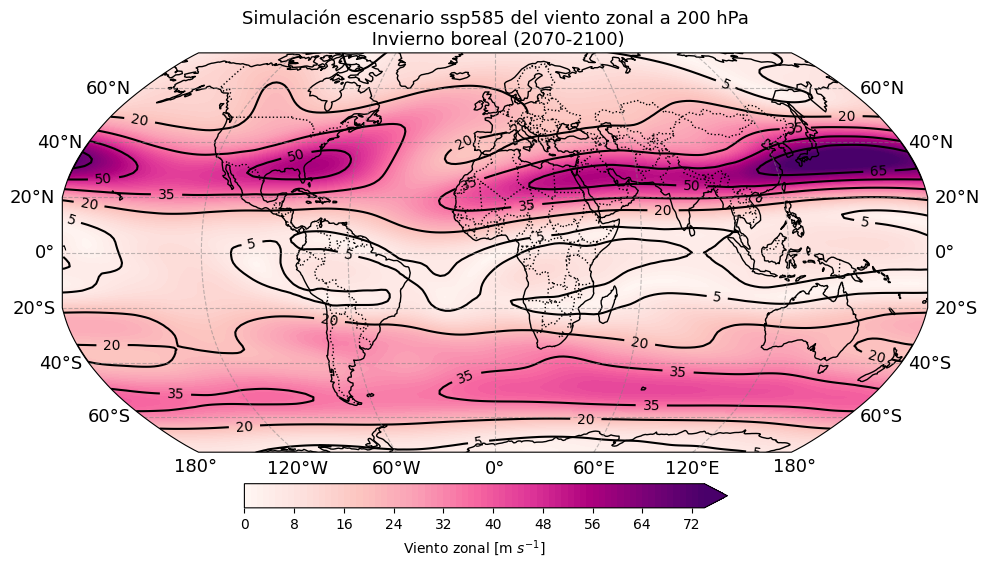

In [25]:
#Llamar la funciòn contour_f para que nos haga el mapa
contour_f(magnitud585,magnitud585,levels=np.arange(0,75),ccmap='RdPu',extend='max',limite_NS=75,clevels=np.arange(5,75,15),titulo=
      'Simulación escenario ssp585 del viento zonal a 200 hPa\n Invierno boreal (2070-2100)',cbarlabel='Viento zonal [m $s^{-1}$]')
#plt.savefig('ssp585_200hPa.png', dpi=300, bbox_inches='tight')

---
### **<font color="Purple"> Diferencia de ambas simulaciones para DJF</font>**
---

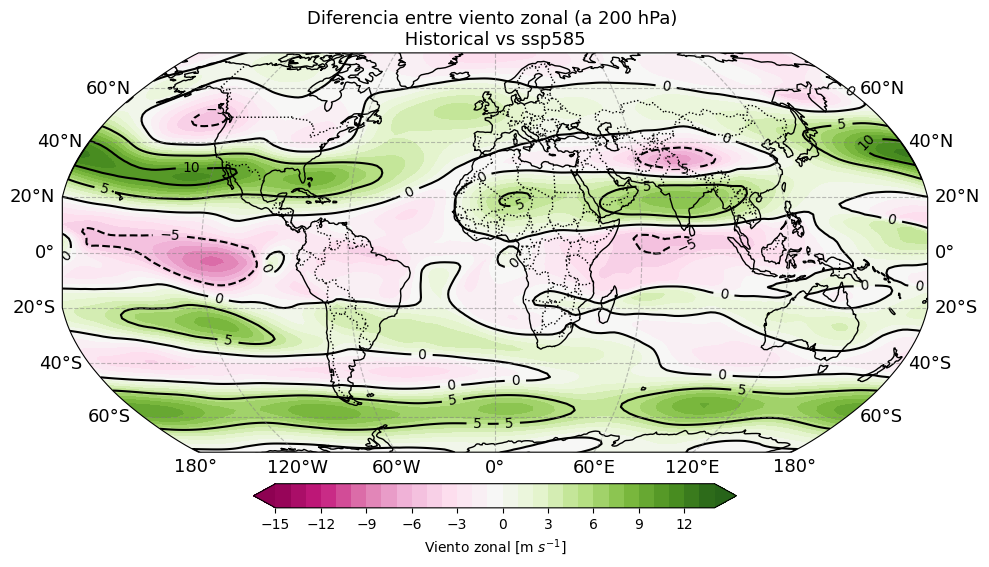

In [26]:
# Mapeamos la diferencia entre ambas simulaciones en el invierno boreal   
contour_f(magnitud585-magnitudDJF,magnitud585-magnitudDJF,levels=np.arange(-15,15),ccmap='PiYG',extend='both',limite_NS=75,clevels=np.arange(-15,15,5),titulo=
      'Diferencia entre viento zonal (a 200 hPa) \n Historical vs ssp585 ',cbarlabel='Viento zonal [m $s^{-1}$]')
#plt.savefig('diferencia_200hPa.png', dpi=300, bbox_inches='tight')